**Deep Learning Micro Project**

**Name : G.Siva Ashok**

**Guide: Prof. R. Raja Subramanian**

**Description**

This is the python program for Face or any object detection using VGG19 architecture, Tensorflow, cv2, Matplotlib for image showing

Here we will take dataset from kaggle and the dataset is mainly based on logos of various brands.

Finally we are training and validating as we get accuracy more than 85 then callback and prediction our custom image from testing set

In [ ]:
#Importing all required libraries
import tensorflow as tf
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/logos1")

In [ ]:
resultant="/content/augmentedimages1"

In [ ]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
    
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images) 
labels = np.array(labels)

ac-dc-black-vector-logo-400x400.png
ac-pisa-1909-vector-logo-400x400.png
abu-dhabi-logo.png
adidas-celebrate-originality-vector-logo-400x400.png
adidas-originals-logo-400x400.png
abta-logo-vector-download-400x400.jpg
ac-cuneo-1905-vector-logo-400x400.png
adidas-black-vector-logo-400x400.png
adidas-3-vector-logo-400x400.png
abs-wheels-vector-logo-400x400.png
abercrombie-and-fitch-black-vector-logo-400x400.png
Adidas-logo-400x400.png
ac-milan-eps-vector-logo-400x400.png
aareal-bank-vector-logo-400x400.png
advan-logo-vector-download.jpg
Adidas-Trefoil-logo-vector-for-free-download.png
adobe-eps-vector-logo-400x400.png
air-asia-eps-vector-logo-400x400.png
Adidas-Y-3-logo-vector-free-download.png
afc-champions-league-logo.png
aguilas-del-america-vector-logo-400x400.png
air-arabia-vector-logo-400x400.png
aeon-logo-vector-400x400.png
adobe-systems-vector-logo-400x400.png
Agribank-logo-400x400.png
airtel-logo-vector-400x400.png
ak-sigorta-vector-logo-400x400.png
alianza-francesa-vector-logo-40

In [ ]:
images.shape

(731, 224, 224, 3)

In [ ]:
# change the model here for alternatives

model = VGG19(weights="imagenet")
for i in model.layers:
    i.trainable =  False

574710816/574710816 [==============================] - 4s 0us/step


In [ ]:
len(model.layers)

26

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model2 = Sequential() 

# adding layers from pre-trained model
for i in range(18):
    model2.add(model.layers[i])

In [ ]:
# adding custum layers
model2.add(Flatten())
model2.add(Dense(900,activation="relu"))
model2.add(Dense(800,activation="relu"))
model2.add(Dense(731,activation="Softmax"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .85):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(85))   
            self.model.stop_training = True
callbacks = myCallback()

**Training and Validation**

In [ ]:
# model1.summary()
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
23/23 [==============================] - 508s 22s/step - loss: 1920.8323 - accuracy: 0.3037
Epoch 2/100
23/23 [==============================] - 510s 22s/step - loss: 137.6018 - accuracy: 0.7743
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 35.1721 - accuracy: 0.9056 call

Reached 99.00% accuracy, so stopping training!!
23/23 [==============================] - 511s 22s/step - loss: 35.1721 - accuracy: 0.9056


In [ ]:
model2.evaluate(images,labels)

23/23 [==============================] - 477s 21s/step - loss: 9.1747 - accuracy: 0.9699


[9.174651145935059, 0.9699042439460754]

In [ ]:
def predict(i,model,labels):
    path1 = "/content/drive/MyDrive/Testing Set/"+i
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(model.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (-5,20), cv2.FONT_HERSHEY_SIMPLEX,1, (200,200,0), 3, cv2.LINE_AA)
    plt.imshow(img)

**Output**

1/1 [==============================] - 1s 600ms/step


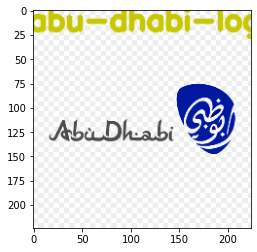

In [ ]:
predict("Abu-Dubai-Testing.png",model2,classes)

**Thank you 😊**

**Video Link**

https://drive.google.com/file/d/17JsD2JrIsP99Pjfs8Yee7jPpoSihH8AJ/view?usp=share_link 